In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Air = pd.read_excel('./AirConditionerReliability.xlsx')
Air.head()

,Type,Failure
0,1,94
1,1,109
2,1,150
3,1,179
4,1,212


In [3]:
#1 전체 데이터의 기초 통계치 및 히스토그램

Air.describe()

,Type,Failure
count,213.000000,213.000000
mean,2.051643,982.342723
std,0.772254,630.475285
min,1.000000,23.000000
25%,1.000000,464.000000
50%,2.000000,907.000000
75%,3.000000,1482.000000
max,3.000000,2722.000000


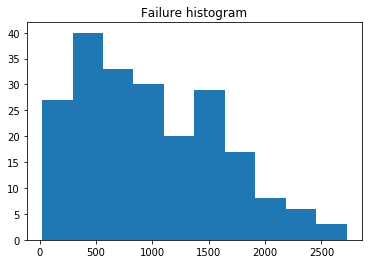

In [7]:
plt.hist(Air['Failure'])
plt.title('Failure histogram')
plt.show()

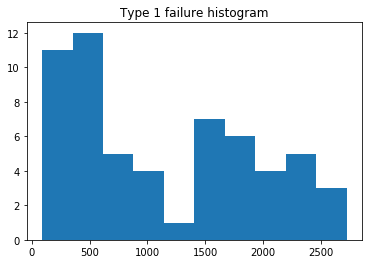

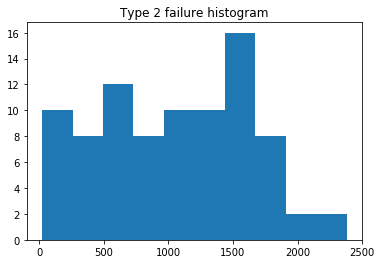

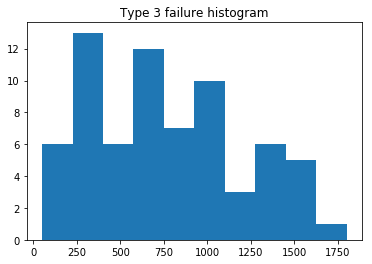

In [6]:
#2 데이터 유형(Type) 별 기초 통계치 및 히스토그램

grouped = Air.groupby('Type')
for type_, group in grouped:
    plt.hist(group['Failure'])
    plt.title('Type {} failure histogram'.format(type_))
    plt.show()

In [8]:
type1 = Air[Air['Type']==1]['Failure']
type2 = Air[Air['Type']==2]['Failure']
type3 = Air[Air['Type']==3]['Failure']

In [9]:
type1.describe()

count      58.000000
mean     1149.982759
std       808.414226
min        90.000000
25%       430.500000
50%       974.000000
75%      1847.000000
max      2722.000000
Name: Failure, dtype: float64

In [10]:
type2.describe()

count      86.000000
mean     1044.883721
std       584.649506
min        23.000000
25%       544.750000
50%      1073.500000
75%      1503.500000
max      2379.000000
Name: Failure, dtype: float64

In [11]:
type3.describe()

count      69.000000
mean      763.478261
std       432.035831
min        50.000000
25%       380.000000
50%       715.000000
75%      1052.000000
max      1800.000000
Name: Failure, dtype: float64

In [13]:
# 데이터 유형 별 MTTF 및 B25 수치

print('type1_MTTF : ', type1.describe()['mean'])
print('type2_MTTF : ', type2.describe()['mean'])
print('type3_MTTF : ', type3.describe()['mean'])
print('type1_B25 : ', type1.describe()['25%'])
print('type2_B25 : ', type2.describe()['25%'])
print('type3_B25 : ', type3.describe()['25%'])

type1_MTTF :  1149.9827586206898
type2_MTTF :  1044.8837209302326
type3_MTTF :  763.4782608695652
type1_B25 :  430.5
type2_B25 :  544.75
type3_B25 :  380.0


In [14]:
# 데이터 유형 별 F(t), R(t), f(t), h(t)

index = ['({}:{})'.format(t,t+250) for t in range(0,2750,250)]

cdf = pd.DataFrame(index=index, columns=['Type1','Type2', 'Type3'])

for i, t in zip(cdf.index, range(0,2750,250)):
    cdf.loc[i,'Type1'] = sum(type1 < t+250)
    cdf.loc[i,'Type2'] = sum(type2 < t+250)
    cdf.loc[i,'Type3'] = sum(type3 < t+250)

In [15]:
cdf

,Type1,Type2,Type3
(0:250),8,10,6
(250:500),18,19,22
(500:750),25,30,37
(750:1000),30,39,50
(1000:1250),32,48,55
(1250:1500),35,64,65
(1500:1750),42,78,68
(1750:2000),46,82,69
(2000:2250),50,85,69
(2250:2500),56,86,69


In [18]:
t = range(0, 3000, 250)

type1_Ft = [0] + [x/len(type1) for x in cdf['Type1']]
type2_Ft = [0] + [x/len(type2) for x in cdf['Type2']]
type3_Ft = [0] + [x/len(type3) for x in cdf['Type3']]

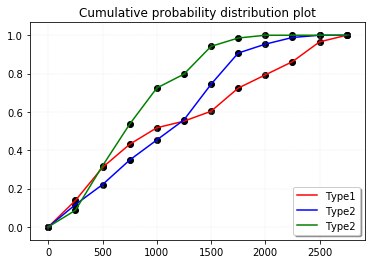

In [20]:
# F(t)

plt.plot(t, type1_Ft, color = 'r', label = 'Type1')
plt.plot(t, type2_Ft, color = 'b', label = 'Type2')
plt.plot(t, type3_Ft, color = 'g', label = 'Type2')

plt.scatter(t, type1_Ft, color = 'black')
plt.scatter(t, type2_Ft, color = 'black')
plt.scatter(t, type3_Ft, color = 'black')

plt.title('Cumulative probability distribution plot')
plt.grid(True, lw = 0.4, ls ='--', c='.90')
plt.legend(shadow=True, fancybox=True,loc='lower right')

plt.show()

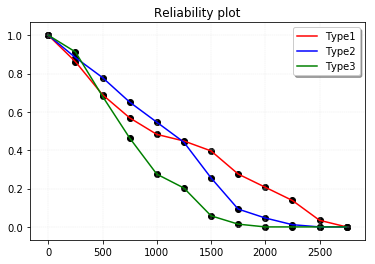

In [26]:
# R(t)

t = range(0, 3000, 250)

type1_Rt = [1] + [1-x/len(type1) for x in cdf['Type1']]
type2_Rt = [1] + [1-x/len(type2) for x in cdf['Type2']]
type3_Rt = [1] + [1-x/len(type3) for x in cdf['Type3']]

plt.plot(t, type1_Rt, color = 'r', label = 'Type1')
plt.plot(t, type2_Rt, color = 'b', label = 'Type2')
plt.plot(t, type3_Rt, color = 'g', label = 'Type3')

plt.scatter(t, type1_Rt, color = 'black')
plt.scatter(t, type2_Rt, color = 'black')
plt.scatter(t, type3_Rt, color = 'black')

plt.title('Reliability plot')
plt.grid(True, lw = 0.4, ls ='--', c='.90')
plt.legend(shadow=True, fancybox=True,loc='upper right')

plt.show()

In [40]:
# f(t)

t = [t_ + 250 for t_ in range(0,2750,250)]

type1_failure = 0
type1_ft = [cdf.iloc[0,0]/len(type1)/250]

for i in range(len(cdf.index))[1:]:
    type1_ft.append((cdf.iloc[i,0]-cdf.iloc[i-1,0])/len(type1)/250)
    type1_failure += cdf.iloc[i,0]-cdf.iloc[i-1,0]
    
type2_failure = 0
type2_ft = [cdf.iloc[0,1]/len(type2)/250]

for i in range(len(cdf.index))[1:]:
    type2_ft.append((cdf.iloc[i,1]-cdf.iloc[i-1,1])/len(type2)/250)
    type2_failure += cdf.iloc[i,1]-cdf.iloc[i-1,1]
    
type3_failure = 0
type3_ft = [cdf.iloc[0,2]/len(type3)/250]

for i in range(len(cdf.index))[1:]:
    type3_ft.append((cdf.iloc[i,2]-cdf.iloc[i-1,2])/len(type3)/250)
    type3_failure += cdf.iloc[i,2]-cdf.iloc[i-1,2]


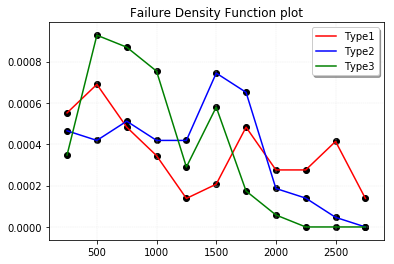

In [41]:
plt.plot(t, type1_ft, color ='r', label = 'Type1')
plt.plot(t, type2_ft, color ='b', label = 'Type2')
plt.plot(t, type3_ft, color ='g', label = 'Type3')

plt.scatter(t, type1_ft, color ='black')
plt.scatter(t, type2_ft, color = 'black')
plt.scatter(t, type3_ft, color = 'black')

plt.title('Failure Density Function plot')
plt.grid(True,lw=0.4,ls='--',c='.90')
plt.legend(shadow=True,fancybox=True,loc='upper right')
plt.show()

In [44]:
# h(t)

t = [t_ + 250 for t_ in range(0,2750,250)]

type1_failure = 0
type1_ht = [cdf.iloc[0,0]/len(type1)/250]

for i in range(len(cdf.index))[1:]:
    type1_ht.append((cdf.iloc[i,0]-cdf.iloc[i-1,0])/len(type1)-type1_failure/250)
    type1_failure += cdf.iloc[i,0]-cdf.iloc[i-1,0]
    
type2_failure = 0
type2_ht = [cdf.iloc[0,1]/len(type2)/250]

for i in range(len(cdf.index))[1:]:
    type2_ht.append((cdf.iloc[i,1]-cdf.iloc[i-1,1])/len(type2)-type2_failure/250)
    type2_failure += cdf.iloc[i,1]-cdf.iloc[i-1,1]
    
type3_failure = 0
type3_ht = [cdf.iloc[0,2]/len(type3)/250]

for i in range(len(cdf.index))[1:]:
    type3_ht.append((cdf.iloc[i,2]-cdf.iloc[i-1,2])/len(type3)-type3_failure/250)
    type3_failure += cdf.iloc[i,2]-cdf.iloc[i-1,2]


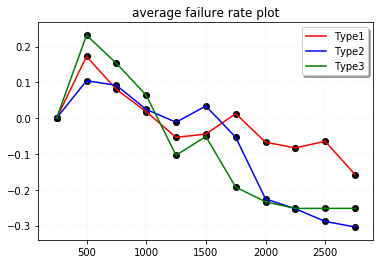

In [46]:
plt.plot(t, type1_ht, color ='r', label = 'Type1')
plt.plot(t, type2_ht, color ='b', label = 'Type2')
plt.plot(t, type3_ht, color ='g', label = 'Type3')

plt.scatter(t, type1_ht, color ='black')
plt.scatter(t, type2_ht, color = 'black')
plt.scatter(t, type3_ht, color = 'black')

plt.title('average failure rate plot')
plt.grid(True,lw=0.4,ls='--',c='.90')
plt.legend(shadow=True,fancybox=True,loc='upper right')
plt.show()